In [1]:
#코랩 한글 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#이 셀을 먼저 실행 후 런타임을 다시시작하여 실행합니다.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 67 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [2]:
!pip install tika
!pip install konlpy

     |████████████████████████████████| 19.4 MB 5.7 MB/s 
     |████████████████████████████████| 448 kB 29.0 MB/s 


In [3]:
from google.colab import files
from tika import parser
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Twitter
from konlpy.tag import Okt
from matplotlib import font_manager, rc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
plt.rc('font', family='NanumBarunGothic')
#코랩 한글폰트 다운로드 후 설정하는 과정


In [5]:
from google.colab import files

uploaded = files.upload()
#데이콘에서 다운받은 14개의 pdf 파일을 업로드 해줍니다.

Saving 기호_1 공약.pdf to 기호_1 공약.pdf
Saving 기호_2 공약.pdf to 기호_2 공약.pdf


In [6]:
pdf_path = "기호_1 공약.pdf" 
parsed = parser.from_file(pdf_path)
txt = open('기호_1 공약.txt', 'w', encoding = 'utf-8')
print(parsed['content'], file = txt)
txt.close()

pdf_path = "기호_2 공약.pdf" 
parsed = parser.from_file(pdf_path)
txt = open('기호_2 공약.txt', 'w', encoding = 'utf-8')
print(parsed['content'], file = txt)
txt.close()


2022-05-17 16:48:14,863 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2022-05-17 16:48:15,525 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2022-05-17 16:48:15,899 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [ ]:
text = open('기호_2 공약.txt', 'r')
print(text.read())

#txt파일로 잘 변환이 되었는지 확인 해줍니다.

<Figure size 432x288 with 0 Axes>

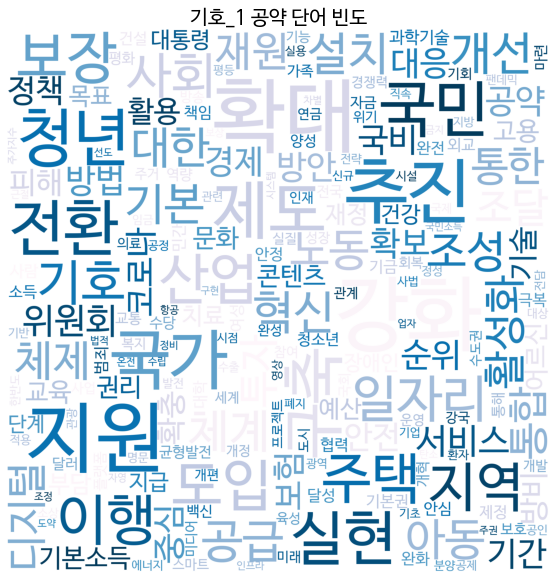

In [8]:
text =  open('기호_1 공약.txt').read() 
okt = Okt()
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1] 
count = Counter(words) 
#변환한 txt 파일에서 형태소 분석을 이용하여 명사의 갯수를 세어줍니다.

wc = WordCloud(font_path='NanumBarunGothic', background_color="white", width=1000, height=1000, scale=2.0, max_font_size=150, colormap = 'PuBu')
gen = wc.generate_from_frequencies(count)
plt.figure()
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("기호_1 공약 단어 빈도", fontsize = 20)
plt.imshow(gen)

#워드클라우드를 이용하여 공약에 많이 나온 단어들을 확인합니다.

<Figure size 432x288 with 0 Axes>

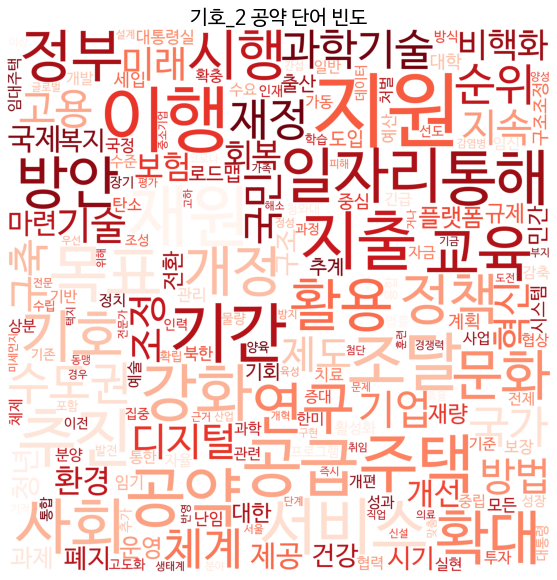

In [9]:
text =  open('기호_2 공약.txt').read() 
okt = Okt()
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1] 
count = Counter(words) 

wc = WordCloud(font_path='NanumBarunGothic', background_color="white", width=1000, height=1000, scale=2.0, max_font_size=150, colormap='Reds')
gen = wc.generate_from_frequencies(count)
plt.figure()
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("기호_2 공약 단어 빈도", fontsize = 20)
plt.imshow(gen)